In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
max_label_len = 0

char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

print(char_list, len(char_list))

def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, chara in enumerate(txt):
        dig_lst.append(char_list.index(chara))

    return dig_lst

!"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz 78


In [3]:
def process_image(img):
    """
    Converts image to shape (32, 128, 1) & normalize
    """
    w, h = img.shape
    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape

    img = img.astype('float32')

    # Converts each to (32, 128, 1)
    if w < 32:
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape

    if h < 128:
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape

    if h > 128 or w > 32:
        dim = (128,32)
        img = cv2.resize(img, dim)

    img = cv2.subtract(255, img)

    img = np.expand_dims(img, axis=2)

    # # Normalize
    img = img / 255.0
    return img

In [4]:
# CTC loss function
def ctc_loss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    return keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)

In [5]:
loaded_model = keras.models.load_model('C:\AI Models\OCR_Model\ocr_model_saved.keras', custom_objects={'ctc_loss': ctc_loss})

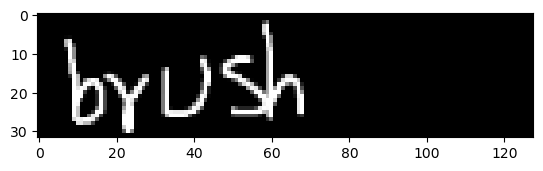

 
1/1 [==============================] - 0s 67ms/step
Predicted text: brush


In [ ]:
image_path=r'C:\AI Models\OCR_Model\test-image.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = process_image(img)

pic = np.asarray(img)
plt.imshow(pic, cmap=plt.cm.gray)
plt.show()
print(' ')

img = np.expand_dims(img, axis=0)
prediction = loaded_model.predict(img)
input_len = np.ones(prediction.shape[0]) * prediction.shape[1]
results = keras.backend.ctc_decode(prediction,
                                    input_length=input_len,
                                    greedy=True)[0][0]

output_text = []
for result in results:
    result = ''.join([char_list[int(i)] for i in result if int(i) != -1])
    output_text.append(result)

predicted_text=output_text[0]
print(f"Predicted text: {predicted_text}")